In [1]:
import os
import sys
import xml.etree.ElementTree as ET
from xml.dom import minidom
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier
from PIL import Image
import glob
import pandas as pd
import tqdm
import numpy as np
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
raster_signs = {'BlackCount' : None,
        'WhiteHolesCount' : None,
        'HorzStrokesCount' : None,
        'VertStrokesCount' : None,
        'MaxHorzStrokeLength' : None,
        'Left' : None,
        'Top' : None,
        'Right' : None,
        'Bottom' : None}

In [17]:
def parse_directoty(directoty):
    x = []
    for filename in os.listdir(directoty):
        if filename[-3:].lower() != 'xml':
            continue
        tree = ET.parse(directoty + '/' + filename)
        root = tree.getroot()
        image = list(root)[-1]
        for word_fragment in image:
            image_info = raster_signs
            for attr_key in word_fragment.attrib:
                if attr_key not in image_info:
                    continue
                image_info[attr_key] = int(word_fragment.attrib[attr_key])
            rect = list(word_fragment)[0].attrib
            for attr_key in rect:
                image_info[attr_key] = int(rect[attr_key])
            info = []
            for key in image_info:
                info.append(image_info[key])
            x.append(info)
    
    return np.array(x)

In [18]:
def parse_img(path):
    x = []
    tree = ET.parse(path)
    root = tree.getroot()
    image = list(root)[-1]
    for word_fragment in image:
        image_info = raster_signs
        for attr_key in word_fragment.attrib:
            if attr_key not in image_info:
                continue
            image_info[attr_key] = int(word_fragment.attrib[attr_key])
        rect = list(word_fragment)[0].attrib
        for attr_key in rect:
            image_info[attr_key] = int(rect[attr_key])
        info = []
        for key in image_info:
            info.append(image_info[key])
        x.append(info)

    return np.array(x)

In [19]:
def draw_roc_curve(y_true, y_pred, title, show_auc=True, figsize=(18,9)):
    plt.figure(figsize=figsize)
    plt.grid()
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    if show_auc:
        plt.plot(fpr, tpr, linewidth=3., label="roc-auc score: {:0.5f}".format(roc_auc_score(y_true, y_pred)))
        plt.legend(fontsize=24)
    else:
        plt.plot(fpr, tpr, linewidth=3.)
    plt.plot([0, 1], [0, 1], 'ko--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(title)
    plt.show()

In [20]:
def draw_pr_curve(y_true, y_pred, title, show_auc=True, figsize=(18,9)):
    plt.figure(figsize=figsize)
    plt.grid()
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    if show_auc:
        plt.plot(precision, recall,
                 linewidth=3., 
                 label="pr-auc score: {:0.5f}".format(
                     average_precision_score(y_test, y_pred)))
        plt.legend(fontsize=24)
    else:
        plt.plot(precision, recall,
                 linewidth=3.)
    plt.xlabel('precision')
    plt.ylabel('recall')
    plt.title(title)
    plt.show()

In [5]:
text_dir = './Text'
nontext_dir = './Nontext'

In [6]:
x_text = parse_directoty(text_dir)
x_nontext = parse_directoty(nontext_dir)

In [7]:
x = np.array([*x_text] + [*x_nontext], np.float)
y = np.array([1]*x_text.shape[0] + [0]*x_nontext.shape[0])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

0:	learn: 0.8689801	total: 996ms	remaining: 16m 34s
1:	learn: 0.8708693	total: 2.1s	remaining: 17m 25s
2:	learn: 0.8668004	total: 2.94s	remaining: 16m 15s
3:	learn: 0.8765077	total: 3.9s	remaining: 16m 12s
4:	learn: 0.8748801	total: 4.95s	remaining: 16m 24s
5:	learn: 0.8767693	total: 5.99s	remaining: 16m 32s
6:	learn: 0.8782806	total: 6.86s	remaining: 16m 12s
7:	learn: 0.8779899	total: 7.77s	remaining: 16m 3s
8:	learn: 0.8813323	total: 9.03s	remaining: 16m 34s
9:	learn: 0.8823495	total: 9.72s	remaining: 16m 1s
10:	learn: 0.8841224	total: 11s	remaining: 16m 24s
11:	learn: 0.8851397	total: 11.7s	remaining: 16m 6s
12:	learn: 0.8857791	total: 12.6s	remaining: 15m 53s
13:	learn: 0.8868835	total: 13.4s	remaining: 15m 45s
14:	learn: 0.8849362	total: 14.5s	remaining: 15m 51s
15:	learn: 0.8859244	total: 15.4s	remaining: 15m 48s
16:	learn: 0.8869125	total: 16.2s	remaining: 15m 34s
17:	learn: 0.8868544	total: 17.2s	remaining: 15m 40s
18:	learn: 0.8878426	total: 18.3s	remaining: 15m 46s
19:	learn:

154:	learn: 0.9191153	total: 1m 46s	remaining: 9m 41s
155:	learn: 0.9191444	total: 1m 47s	remaining: 9m 39s
156:	learn: 0.9195222	total: 1m 47s	remaining: 9m 37s
157:	learn: 0.9196966	total: 1m 47s	remaining: 9m 35s
158:	learn: 0.9198128	total: 1m 48s	remaining: 9m 33s
159:	learn: 0.9201035	total: 1m 48s	remaining: 9m 31s
160:	learn: 0.9202488	total: 1m 49s	remaining: 9m 29s
161:	learn: 0.9203650	total: 1m 49s	remaining: 9m 27s
162:	learn: 0.9203360	total: 1m 50s	remaining: 9m 25s
163:	learn: 0.9202488	total: 1m 50s	remaining: 9m 23s
164:	learn: 0.9204522	total: 1m 50s	remaining: 9m 21s
165:	learn: 0.9208010	total: 1m 51s	remaining: 9m 19s
166:	learn: 0.9207429	total: 1m 51s	remaining: 9m 17s
167:	learn: 0.9208882	total: 1m 52s	remaining: 9m 14s
168:	learn: 0.9210044	total: 1m 52s	remaining: 9m 13s
169:	learn: 0.9209754	total: 1m 52s	remaining: 9m 10s
170:	learn: 0.9212079	total: 1m 53s	remaining: 9m 8s
171:	learn: 0.9211788	total: 1m 53s	remaining: 9m 5s
172:	learn: 0.9214985	total: 1

308:	learn: 0.9328916	total: 2m 19s	remaining: 5m 12s
309:	learn: 0.9329788	total: 2m 20s	remaining: 5m 11s
310:	learn: 0.9330659	total: 2m 20s	remaining: 5m 10s
311:	learn: 0.9331241	total: 2m 20s	remaining: 5m 9s
312:	learn: 0.9334728	total: 2m 20s	remaining: 5m 8s
313:	learn: 0.9335310	total: 2m 20s	remaining: 5m 7s
314:	learn: 0.9334728	total: 2m 21s	remaining: 5m 6s
315:	learn: 0.9333566	total: 2m 21s	remaining: 5m 5s
316:	learn: 0.9334438	total: 2m 21s	remaining: 5m 4s
317:	learn: 0.9337635	total: 2m 21s	remaining: 5m 3s
318:	learn: 0.9337054	total: 2m 21s	remaining: 5m 2s
319:	learn: 0.9339088	total: 2m 21s	remaining: 5m 1s
320:	learn: 0.9340541	total: 2m 22s	remaining: 5m
321:	learn: 0.9340251	total: 2m 22s	remaining: 4m 59s
322:	learn: 0.9340832	total: 2m 22s	remaining: 4m 58s
323:	learn: 0.9341994	total: 2m 22s	remaining: 4m 57s
324:	learn: 0.9342285	total: 2m 22s	remaining: 4m 56s
325:	learn: 0.9342285	total: 2m 23s	remaining: 4m 55s
326:	learn: 0.9344319	total: 2m 23s	remai

461:	learn: 0.9419014	total: 2m 47s	remaining: 3m 15s
462:	learn: 0.9418723	total: 2m 47s	remaining: 3m 14s
463:	learn: 0.9420176	total: 2m 47s	remaining: 3m 13s
464:	learn: 0.9421339	total: 2m 48s	remaining: 3m 13s
465:	learn: 0.9421048	total: 2m 48s	remaining: 3m 12s
466:	learn: 0.9421048	total: 2m 48s	remaining: 3m 12s
467:	learn: 0.9421048	total: 2m 48s	remaining: 3m 11s
468:	learn: 0.9421339	total: 2m 48s	remaining: 3m 11s
469:	learn: 0.9422501	total: 2m 48s	remaining: 3m 10s
470:	learn: 0.9423373	total: 2m 49s	remaining: 3m 9s
471:	learn: 0.9423373	total: 2m 49s	remaining: 3m 9s
472:	learn: 0.9424536	total: 2m 49s	remaining: 3m 8s
473:	learn: 0.9425989	total: 2m 49s	remaining: 3m 8s
474:	learn: 0.9425989	total: 2m 49s	remaining: 3m 7s
475:	learn: 0.9425408	total: 2m 49s	remaining: 3m 7s
476:	learn: 0.9425989	total: 2m 50s	remaining: 3m 6s
477:	learn: 0.9426570	total: 2m 50s	remaining: 3m 5s
478:	learn: 0.9426861	total: 2m 50s	remaining: 3m 5s
479:	learn: 0.9428314	total: 2m 50s	r

615:	learn: 0.9475688	total: 3m 14s	remaining: 2m 1s
616:	learn: 0.9475688	total: 3m 14s	remaining: 2m
617:	learn: 0.9475688	total: 3m 14s	remaining: 2m
618:	learn: 0.9474526	total: 3m 14s	remaining: 1m 59s
619:	learn: 0.9476560	total: 3m 15s	remaining: 1m 59s
620:	learn: 0.9477723	total: 3m 15s	remaining: 1m 59s
621:	learn: 0.9478013	total: 3m 15s	remaining: 1m 58s
622:	learn: 0.9478013	total: 3m 15s	remaining: 1m 58s
623:	learn: 0.9478013	total: 3m 15s	remaining: 1m 58s
624:	learn: 0.9478594	total: 3m 16s	remaining: 1m 57s
625:	learn: 0.9477723	total: 3m 16s	remaining: 1m 57s
626:	learn: 0.9477723	total: 3m 16s	remaining: 1m 56s
627:	learn: 0.9478594	total: 3m 16s	remaining: 1m 56s
628:	learn: 0.9478304	total: 3m 16s	remaining: 1m 56s
629:	learn: 0.9478594	total: 3m 16s	remaining: 1m 55s
630:	learn: 0.9478304	total: 3m 17s	remaining: 1m 55s
631:	learn: 0.9478594	total: 3m 17s	remaining: 1m 54s
632:	learn: 0.9478304	total: 3m 17s	remaining: 1m 54s
633:	learn: 0.9478304	total: 3m 17s	r

768:	learn: 0.9509112	total: 3m 40s	remaining: 1m 6s
769:	learn: 0.9509693	total: 3m 41s	remaining: 1m 6s
770:	learn: 0.9509693	total: 3m 41s	remaining: 1m 5s
771:	learn: 0.9509693	total: 3m 41s	remaining: 1m 5s
772:	learn: 0.9511727	total: 3m 41s	remaining: 1m 5s
773:	learn: 0.9513471	total: 3m 41s	remaining: 1m 4s
774:	learn: 0.9513471	total: 3m 41s	remaining: 1m 4s
775:	learn: 0.9512890	total: 3m 42s	remaining: 1m 4s
776:	learn: 0.9513471	total: 3m 42s	remaining: 1m 3s
777:	learn: 0.9514052	total: 3m 42s	remaining: 1m 3s
778:	learn: 0.9514052	total: 3m 42s	remaining: 1m 3s
779:	learn: 0.9514052	total: 3m 42s	remaining: 1m 2s
780:	learn: 0.9514052	total: 3m 43s	remaining: 1m 2s
781:	learn: 0.9514343	total: 3m 43s	remaining: 1m 2s
782:	learn: 0.9514343	total: 3m 43s	remaining: 1m 1s
783:	learn: 0.9514634	total: 3m 43s	remaining: 1m 1s
784:	learn: 0.9514924	total: 3m 43s	remaining: 1m 1s
785:	learn: 0.9514924	total: 3m 43s	remaining: 1m
786:	learn: 0.9514924	total: 3m 44s	remaining: 1m

925:	learn: 0.9530619	total: 4m 6s	remaining: 19.7s
926:	learn: 0.9530619	total: 4m 6s	remaining: 19.4s
927:	learn: 0.9530619	total: 4m 6s	remaining: 19.2s
928:	learn: 0.9530037	total: 4m 7s	remaining: 18.9s
929:	learn: 0.9531200	total: 4m 7s	remaining: 18.6s
930:	learn: 0.9531781	total: 4m 7s	remaining: 18.3s
931:	learn: 0.9532072	total: 4m 7s	remaining: 18.1s
932:	learn: 0.9532072	total: 4m 7s	remaining: 17.8s
933:	learn: 0.9532072	total: 4m 7s	remaining: 17.5s
934:	learn: 0.9531781	total: 4m 8s	remaining: 17.3s
935:	learn: 0.9531781	total: 4m 8s	remaining: 17s
936:	learn: 0.9532363	total: 4m 8s	remaining: 16.7s
937:	learn: 0.9532363	total: 4m 8s	remaining: 16.4s
938:	learn: 0.9532363	total: 4m 8s	remaining: 16.2s
939:	learn: 0.9532363	total: 4m 9s	remaining: 15.9s
940:	learn: 0.9532363	total: 4m 9s	remaining: 15.6s
941:	learn: 0.9532653	total: 4m 9s	remaining: 15.4s
942:	learn: 0.9532653	total: 4m 9s	remaining: 15.1s
943:	learn: 0.9532653	total: 4m 9s	remaining: 14.8s
944:	learn: 0.

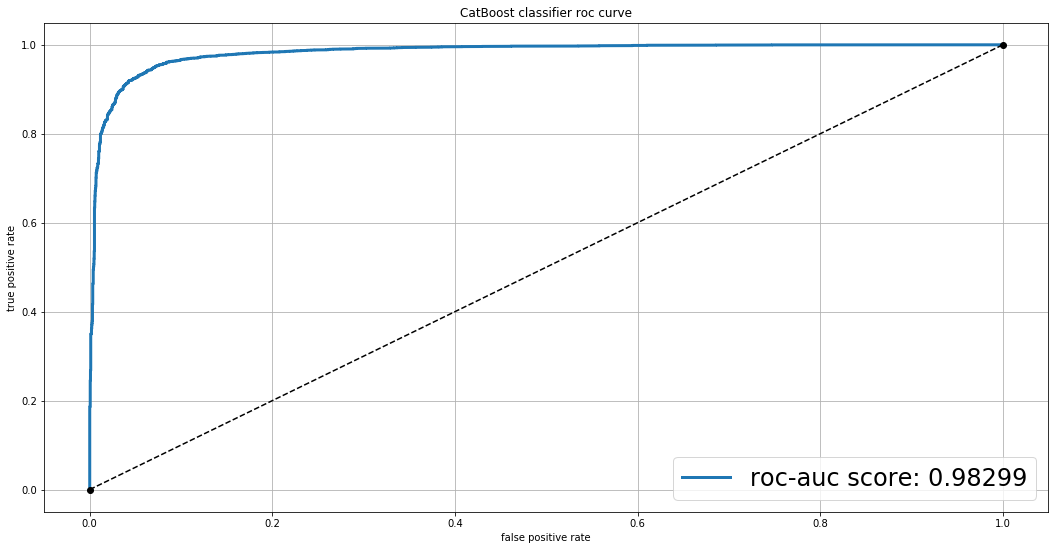

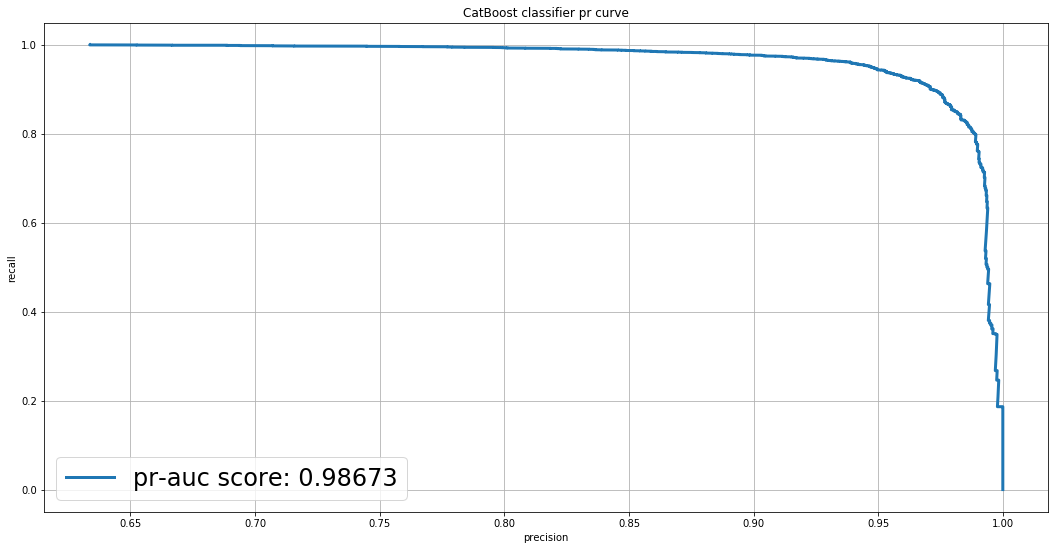

In [30]:
CatBoost_clf = CatBoostClassifier(iterations=1000,
                            depth=8,
                            l2_leaf_reg = 0.1,
                            eval_metric = 'Accuracy',
                            leaf_estimation_iterations = 10
    )

parameters = {'depth'         : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
             }

CatBoost_clf.fit(x_train, y_train)
print("Accuracy: {}".format(accuracy_score(y_test, best_clf.predict(x_test))))

draw_roc_curve(y_test, CatBoost_clf.predict_proba(x_test)[:, 1], "CatBoost classifier roc curve")
draw_pr_curve(y_test, CatBoost_clf.predict_proba(x_test)[:, 1], "CatBoost classifier pr curve")

1.jpg 20 111 0.15267175572519084
10.jpg 173 3486 0.04728067778081443
11.jpg 10 62 0.1388888888888889
12.jpg 5 104 0.045871559633027525
13.jpg 10 90 0.1
14.jpg 53 136 0.2804232804232804
15.jpg 8 189 0.04060913705583756
16.jpg 2 35 0.05405405405405406
17.jpg 147 3897 0.03635014836795252
2.jpg 13 475 0.02663934426229508
3.jpg 70 1418 0.04704301075268817
4.jpg 11 974 0.01116751269035533
5.jpg 13 84 0.13402061855670103
6.jpg 35 954 0.03538928210313448
7.jpg 23 191 0.10747663551401869
8.jpg 39 2469 0.01555023923444976
9.jpg 31 824 0.03625730994152047
938.jpg 157 354 0.30724070450097846
fig10.gif 0 18 0.0
harvest.gif 95 367 0.20562770562770563
Ogre.jpg 130 791 0.14115092290988057


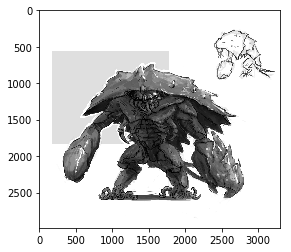

In [64]:
for filename in os.listdir(nontext_dir):
    if filename[-3:].lower() == 'xml':
        continue
    choosen_xml = nontext_dir + '/' + filename[:-3] + 'xml'
    choosen_img = nontext_dir + '/' + filename
    #print(choosen_xml, choosen_img)
    x = parse_img(choosen_xml)
    imshow(Image.open(choosen_img))
    predictions = best_clf.predict(x)
    ones = (predictions == 1).sum()
    zeroes = (predictions == 0).sum()
    print(filename, ones, zeroes,ones/(ones+zeroes))

In [83]:
# Посмотрим ггде он больше всего ошибся
choosen_xml = './Nontext/938.xml'
choosen_img = './Nontext/938.jpg'

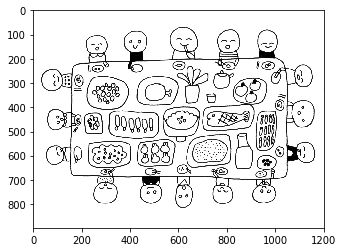

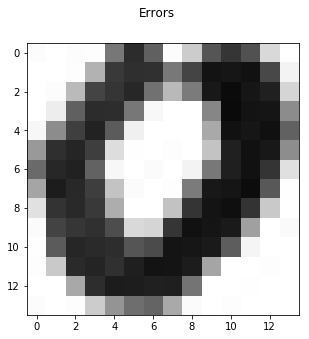

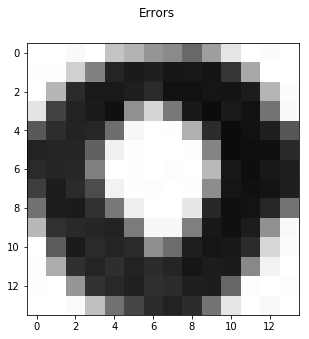

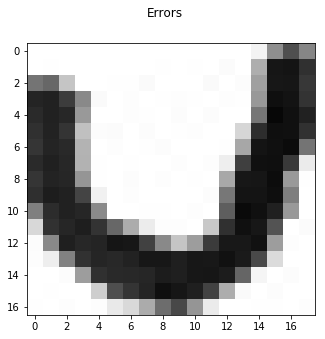

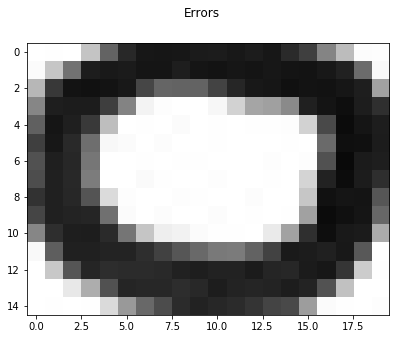

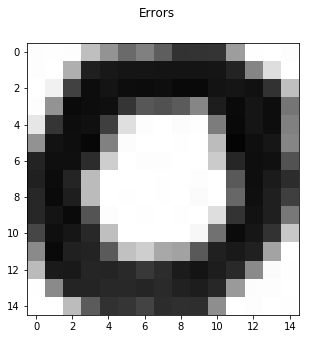

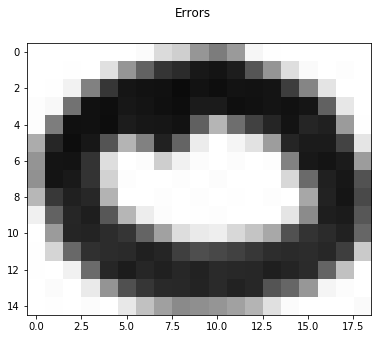

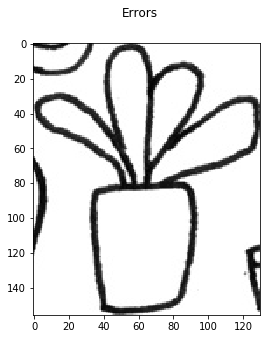

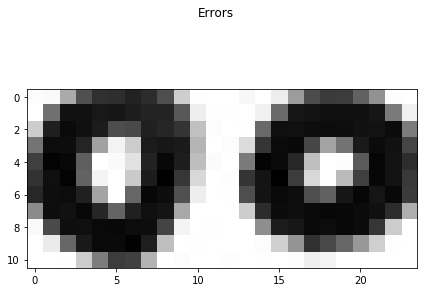

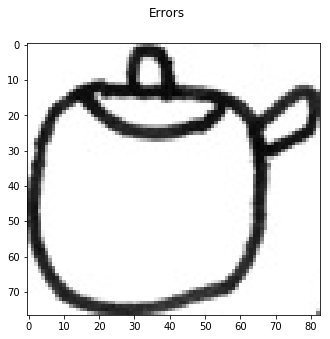

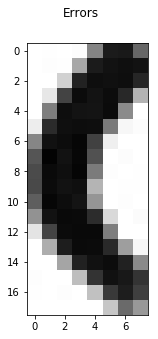


0001.tif 1198 14 0.01155115511551155
0003.tif 3213 33 0.010166358595194085
0005.tif 1489 28 0.01845748187211602
0007.tif 4086 86 0.020613614573346116
0009.tif 1921 37 0.018896833503575076
0024.tif 2419 81 0.0324
0031.tif 1441 87 0.05693717277486911
004.TIF 1197 14 0.011560693641618497
ENG001.TIF 536 74 0.12131147540983607
FAX001.TIF 600 38 0.05956112852664577
GAZ009P.TIF 1136 197 0.14778694673668416
MAG005.TIF 359 6 0.01643835616438356
scan300dpi.tif 4297 348 0.07491926803013993


In [ ]:
x = parse_img(choosen_xml)
imshow(Image.open(choosen_img))
predictions = best_clf.predict(x)
ones = (predictions == 1).sum()
zeroes = (predictions == 0).sum()

false_predicted = [i for i in range(len(predictions)) if predictions[i] == 1]
cropped_ims = []
im = Image.open(choosen_img)

for index in false_predicted:
    crop_rectangle = tuple(x[index][-4:])
    cropped_ims.append(im.crop(crop_rectangle))

for cropped_im in tqdm.tqdm_notebook(cropped_ims[:10]):
    plt.figure(figsize=(7, 5))
    plt.imshow(cropped_im)
    plt.suptitle("Errors")
    plt.show()

for filename in os.listdir(text_dir):
    if filename[-3:].lower() == 'xml':
        continue
    choosen_xml = text_dir + '/' + filename[:-3] + 'xml'
    choosen_img = text_dir + '/' + filename
    #print(choosen_xml, choosen_img)
    x = parse_img(choosen_xml)
    imshow(Image.open(choosen_img))
    predictions = best_clf.predict(x)
    ones = (predictions == 1).sum()
    zeroes = (predictions == 0).sum()
    print(filename, ones, zeroes, zeroes/(ones+zeroes))

In [ ]:
choosen_xml = './Text/ENG001.xml'
choosen_img = './Text/ENG001.tif'

In [ ]:
x = parse_img(choosen_xml)
imshow(Image.open(choosen_img))
predictions = best_clf.predict(x)
ones = (predictions == 1).sum()
zeroes = (predictions == 0).sum()

false_predicted = np.array([i for i in range(len(predictions)) if predictions[i] == 0])
im = Image.open(choosen_img)

cropped_ims = []
for index in false_predicted:
    crop_rectangle = tuple(x[index][-4:])
    cropped_ims.append(im.crop(crop_rectangle))

for cropped_im in tqdm.tqdm_notebook(cropped_ims[:10]):
    plt.figure(figsize=(7, 5))
    plt.imshow(cropped_im)
    plt.suptitle("Errors")
    plt.show()

### Вывод:   
В качестве классификатора использовался CatBoostClassifier. Как видно, он в основном редко ошибается. Рассмотрев, где он больше всего ошибается, что то что он принял з текст и вправду похоже на него. А те что принял за картинку в большинстве случаев не похоже на текст.